<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session9/Assignment_9_cutout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential,Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D
from keras.layers.advanced_activations import ReLU, Softmax
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Activation, Flatten, Dense, Dropout, Concatenate, GlobalAveragePooling2D, Input, Lambda, SpatialDropout2D

Using TensorFlow backend.


 Batch Normalization 
 Dropout
 11 beforeMax Pooling
3 max pooling



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

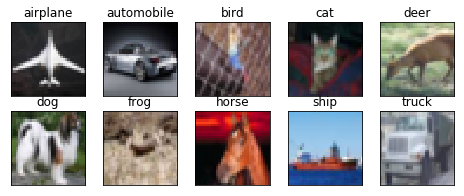

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model

input = Input(shape=(32, 32, 3,))
#Block1

b1_c1 = Conv2D(24, 3, 3, border_mode='same')(input)#32
b1_c1 = ReLU()(b1_c1)
b1_c1 = BatchNormalization()(b1_c1)
b1_c1 = SpatialDropout2D(0.1)(b1_c1)


#Block2
b1_c2 = Conv2D(48, 3, 3, border_mode='same')(b1_c1)#32
b1_c2 = ReLU()(b1_c2)
b1_c2 = BatchNormalization()(b1_c2)
b1_c2 = SpatialDropout2D(0.1)(b1_c2)

#Trans1
t1_bottle = Conv2D(48, 1, 1, border_mode='same')(b1_c2)#32
t1_bottle = ReLU()(t1_bottle)
t1_bottle = MaxPooling2D(pool_size=(2, 2))(t1_bottle)#16
t1_bottle = BatchNormalization()(t1_bottle)
t1_bottle = SpatialDropout2D(0.1)(t1_bottle)


# Block3
b1_c3 = Conv2D(96, 3, 3, border_mode='same')(t1_bottle)#16
b1_c3 = ReLU()(b1_c3)
b1_c3 = BatchNormalization()(b1_c3)
b1_c3 = SpatialDropout2D(0.1)(b1_c3)

#Block4
b1_c4 = Conv2D(192, 3, 3, border_mode='same')(b1_c3)#16
b1_c4 = ReLU()(b1_c4)

#Trans2
t2_bottle = Conv2D(48, 1, 1, border_mode='same')(b1_c4)#16
t2_bottle = ReLU()(t2_bottle)
t2_bottle = MaxPooling2D(pool_size=(2, 2))(t2_bottle)#8
t2_bottle = BatchNormalization()(t2_bottle)
t2_bottle = SpatialDropout2D(0.1)(t2_bottle)

#Block5
b1_c5 = Conv2D(96, 3, 3, border_mode='same')(t2_bottle)#8
b1_c5 = ReLU()(b1_c5)
b1_c5 = BatchNormalization()(b1_c5)
b1_c5 = SpatialDropout2D(0.1)(b1_c5)


#Block6
b1_c6 = Conv2D(192, 3, 3, border_mode='same')(b1_c5)#8
b1_c6 = ReLU()(b1_c6)



#Trans3
t3_bottle = Conv2D(96, 1, 1, border_mode='same')(b1_c6)#8
t3_bottle = ReLU()(t3_bottle)
t3_bottle = MaxPooling2D(pool_size=(2, 2))(t3_bottle)#4
t3_bottle = BatchNormalization()(t3_bottle)
t3_bottle = SpatialDropout2D(0.1)(t3_bottle)


#Block7
c1_final = Conv2D(192, 3, 3, border_mode='same',name='final_cv')(t3_bottle)
 

reduce_ch = Conv2D(10, (1,1), use_bias=False)(c1_final)
avg_pool = GlobalAveragePooling2D()(reduce_ch)
output = Softmax()(avg_pool)  

model = Model(inputs=[input], outputs=[output])
model.summary()

W0630 16:23:09.247966 140259146323840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 16:23:09.262009 140259146323840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), padding="same")`
  """
W0630 16:23:09.265781 140259146323840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 16:23:09.293911 140259146323840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/ba

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 24)        672       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32, 32, 24)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 24)        96        
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 48)        10416     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 32, 32, 48)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), name="final_cv", padding="same")`


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0630 16:23:20.319221 140259146323840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/EVA/Session9/saveBest_cutout.hdf9"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='auto', save_best_only=True,save_weights_only=True)

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app
W0630 16:23:42.331205 140259146323840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 28s 73ms/step - loss: 1.6192 - acc: 0.4088 - val_loss: 1.3282 - val_acc: 0.5471

Epoch 00001: val_acc improved from -inf to 0.54710, saving model to /content/gdrive/My Drive/EVA/Session9/saveBest_cutout.hdf9
Epoch 2/100
390/390 [==============================] - 25s 63ms/step - loss: 1.2332 - acc: 0.5610 - val_loss: 0.9136 - val_acc: 0.6771

Epoch 00002: val_acc improved from 0.54710 to 0.67710, saving model to /content/gdrive/My Drive/EVA/Session9/saveBest_cutout.hdf9
Epoch 3/100
390/390 [==============================] - 24s 63ms/step - loss: 1.0607 - acc: 0.6251 - val_loss: 0.8917 - val_acc: 0.6861

Epoch 00003: val_acc improved from 0.67710 to 0.68610, saving model to /content/gdrive/My Drive/EVA/Session9/saveBest_cutout.hdf9
Epoch 4/100
390/390 [==============================] - 24s 62ms/step - loss: 0.9688 - acc: 0.6597 - val_loss: 0.8476 - val_acc: 0.7147

Epoch 00004: val_acc improved from 0.68610 to 0.71470, saving model to /content/g

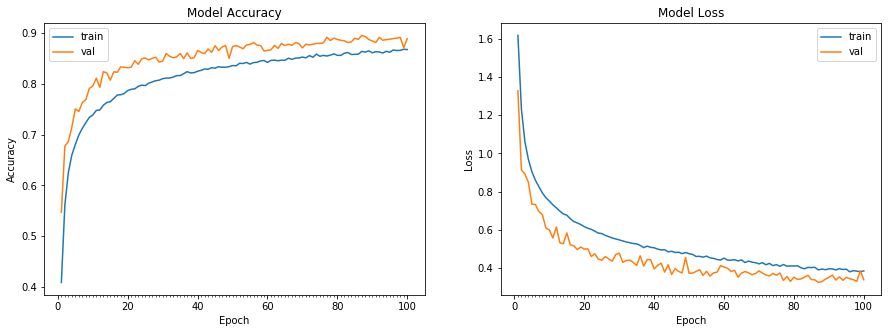

Accuracy on test data is: 88.85


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# save model
model.save('/content/gdrive/My Drive/EVA/Session9/saveBest_cutout.hdf9')

In [0]:
from keras.models import load_model
# load model back
model = load_model('/content/gdrive/My Drive/EVA/Session9/saveBest_cutout.hdf9')

In [0]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

[3]
[[3.1652957e-02 4.1994895e-08 9.6113318e-01 2.9744019e-03 7.1494957e-04
  1.9569731e-04 3.3080238e-03 2.0688223e-05 1.3374917e-08 5.1668305e-08]]


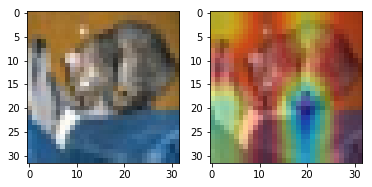

In [19]:
img = test_data[0]
#img = range(4)
x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#print(img.dtype)
print(test_labels[0])


preds = model.predict(x)  #model
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]  #moel
last_conv_layer = model.get_layer("final_cv")   # model



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(192):
   conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
   

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


import matplotlib.pyplot as plt

%matplotlib inline
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#print(img.dtype,heatmap.dtype)
superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(superimposed)

[3]
[[2.9450157e-01 1.9784266e-13 7.0547879e-01 6.9652492e-06 1.5270554e-09
  2.3322595e-09 1.2556427e-05 4.3298314e-08 3.1611493e-09 2.7450657e-13]]


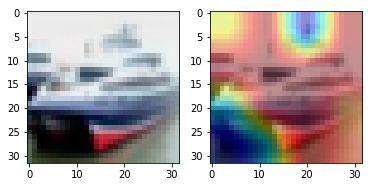

In [20]:
img = test_data[1]
#img = range(4)
x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#print(img.dtype)
print(test_labels[0])


preds = model.predict(x)  #model
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]  #moel
last_conv_layer = model.get_layer("final_cv")   # model



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(192):
   conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
   

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


import matplotlib.pyplot as plt

%matplotlib inline
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#print(img.dtype,heatmap.dtype)
superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(superimposed)

[3]
[[4.9960952e-05 8.4413067e-15 7.7250419e-04 6.5256477e-06 1.1078482e-05
  4.0171522e-05 2.4234993e-07 9.9911958e-01 4.4084573e-11 6.1752041e-11]]


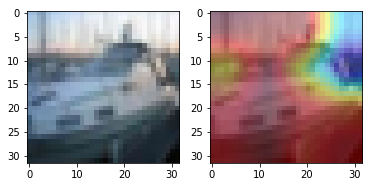

In [21]:
img = test_data[2]
#img = range(4)
x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#print(img.dtype)
print(test_labels[0])


preds = model.predict(x)  #model
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]  #moel
last_conv_layer = model.get_layer("final_cv")   # model



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(192):
   conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
   

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


import matplotlib.pyplot as plt

%matplotlib inline
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#print(img.dtype,heatmap.dtype)
superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(superimposed)

[3]
[[9.9472708e-01 3.6228359e-10 5.2492293e-03 1.3016756e-05 2.6785904e-06
  3.2245089e-07 2.2842689e-06 5.0023714e-06 3.2653540e-07 5.2807376e-09]]


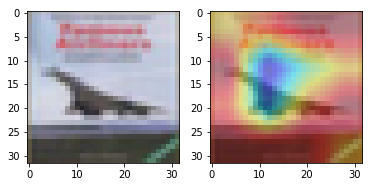

In [22]:
img = test_data[3]
#img = range(4)
x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#print(img.dtype)
print(test_labels[0])


preds = model.predict(x)  #model
print(preds)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]  #moel
last_conv_layer = model.get_layer("final_cv")   # model



grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(192):
   conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
   

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


import matplotlib.pyplot as plt

%matplotlib inline
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#print(img.dtype,heatmap.dtype)
superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(superimposed)